minimize
z= 0.043x1 + 0.027x2 + 0.025x3 + 0.022x4 + 0.045x5 - 0.0275y

subject to

x1 + 3x2 + x3 + 7x4 + x5 - y ≤ 100,

x2 + 2x3 + 4x4 ≥ 60,

-0.8x1 + 4.8x2 - 1.8x3 + 3.8x4 + 2.2x5 >= 0

x1 - x2 + x3 - x4 + x5 <= 0

-0.8x1 + 4.8x2 - 1.8x3 + 3.8x4 + 2.2x5 <= 0

x1 - x2 + x3 - x4 + x5 >= 0

-x1 + 12x2 + x3 + 3x4 - 5x5 <= 0

x1 + x2 + x3 - x5 >= 0

-x1 + 12x2 + x3 + 3x4 - 5x5 >= 0

x1 + x2 + x3 - x5 <= 0

x1, x2, x3, x4, x5 ≥ 0,

y ∈ [0, 2.5

In [1]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00


In [22]:
from pyomo.environ import *

In [23]:
!apt-get install -y -qq glpk-utils

In [24]:
model1=ConcreteModel()

In [7]:
model1.x1 = Var(domain = Reals)
model1.x2 = Var(domain = Reals)
model1.x3 = Var(domain = Reals)
model1.x4 = Var(domain = Reals)
model1.x5 = Var(domain = Reals)
model1.y = Var(domain = Reals,bounds=(0, 2.5))
# declaring constraints
#first constraint
model1.constr1 = Constraint(expr =  1*model1.x1 + 3*model1.x2 + model1.x3 + 7*model1.x4 +model1.x5 - model1.y <= 100)
#second  constraint
model1.constr2 = Constraint(expr =  1*model1.x2 + 2*model1.x3 + 4*model1.x4 >= 60)
# third  divisival cases

model1.constr3 = Constraint(expr = -0.8*model1.x1 + 4.8*model1.x2 - 1.8*model1.x3 +3.8*model1.x4 + 2.2*model1.x5 >= 0)

model1.constr4 = Constraint(expr = 1*model1.x1 - 1*model1.x2 + 1*model1.x3 - 1*model1.x4 + 1*model1.x5 <= 0)
# fourth   divisival cases

model1.constr5 = Constraint(expr = -1*model1.x1 + 12*model1.x2 + 1*model1.x3 + 3*model1.x4 - 5*model1.x5 >= 0)

model1.constr6 = Constraint(expr = 1*model1.x1 + model1.x2 + model1.x3 - model1.x5 <=0 )

model1.constr11= Constraint(expr = model1.x1 >= 0)
model1.constr12 = Constraint(expr = model1.x2 >= 0)
model1.constr13 = Constraint(expr = model1.x3 >= 0)
model1.constr14 = Constraint(expr = model1.x4 >= 0)
model1.constr15 = Constraint(expr = model1.x5 >= 0)

# declaring objective function for optimization problem
model1.cost = Objective(expr = 0.043*model1.x1 + 0.027*model1.x2 + 0.025*model1.x3 + 0.022*model1.x4 + 0.045*model1.x5 - 0.0275*model1.y, sense = minimize)


In [25]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1).write()
print('\nCost = ', model1.cost())
print('\nDecision Variables')
print('x1 = ', model1.x1())
print('x2 = ', model1.x2())
print('x3 = ', model1.x3())
print('x4 = ', model1.x4())
print('x5 = ', model1.x5())
print('y = ', model1.y())
#print('y2 = ', model1.y2())

print('\nConstraints')
print('Constraint 1 = ', model1.constr1())
print('Constraint 2 = ', model1.constr2())
print('Constraint 3 = ', model1.constr3())
print('Constraint 4 = ', model1.constr4())
print('Constraint 5 = ', model1.constr5())
print('Constraint 6 = ', model1.constr6())






# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.359583333333333
  Upper bound: 0.359583333333333
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 6
  Number of nonzeros: 33
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.01122426986694336
# ----------------------------------------------------------
#   Solution Information
# -----------

In [9]:
model1.pprint()

6 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :   0.0 :  None : False : False :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :  None : 1.66666666666667 :  None : False : False :  Reals
    x4 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :  None : 14.1666666666667 :  None : False : False :  Reals
    x5 : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :  None : 1.66666666666666 :  None : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   2.5 :   2.5 : False : False :  Reals

1 O

In [16]:
model2=ConcreteModel()

In [17]:
from pyomo.environ import *

# Create a ConcreteModel
model2 = ConcreteModel()

# Define decision variables
model2.x1 = Var(domain=Reals)
model2.x2 = Var(domain=Reals)
model2.x3 = Var(domain=Reals)
model2.x4 = Var(domain=Reals)
model2.x5 = Var(domain=Reals)
model2.y = Var(domain=Reals, bounds=(0, 2.5))

# Define constraints
model2.constr1 = Constraint(expr=1 * model2.x1 + 3 * model2.x2 + model2.x3 + 7 * model2.x4 + model2.x5 - model2.y <= 100)
model2.constr2 = Constraint(expr=1 * model2.x2 + 2 * model2.x3 + 4 * model2.x4 >= 60)
model2.constr3 = Constraint(expr=-0.8 * model2.x1 + 4.8 * model2.x2 - 1.8 * model2.x3 + 3.8 * model2.x4 + 2.2 * model2.x5 <= 0)
model2.constr5 = Constraint(expr=1 * model2.x1 - 1 * model2.x2 + 1 * model2.x3 - 1 * model2.x4 + 1 * model2.x5 >= 0)
model2.constr7 = Constraint(expr=-1 * model2.x1 + 12 * model2.x2 + 1 * model2.x3 + 3 * model2.x4 - 5 * model2.x5 <= 0)
model2.constr9 = Constraint(expr=1 * model2.x1 + 1 * model2.x2 + 1 * model2.x3 - 1 * model2.x5 >= 0)
model2.constr11 = Constraint(expr=model2.x1 >= 0)
model2.constr12 = Constraint(expr=model2.x2 >= 0)
model2.constr13 = Constraint(expr=model2.x3 >= 0)
model2.constr14 = Constraint(expr=model2.x4 >= 0)
model2.constr15 = Constraint(expr=model2.x5 >= 0)

# Define the objective function
model2.cost = Objective(expr=0.043 * model2.x1 + 0.027 * model2.x2 + 0.025 * model2.x3 + 0.022 * model2.x4
                        + 0.045 * model2.x5 - 0.0275 * model2.y, sense=minimize)

# Create a solver (e.g., GLPK)
solver = SolverFactory('glpk')

# Solve the optimization problem
results = solver.solve(model2)

# Check the solver status
if str(results.Solver.status) == 'ok':
    # Display the results
    print("Solver Status: Solver finished successfully")
    print("Objective Value =", model2.cost())
    print("x1 =", model2.x1())
    print("x2 =", model2.x2())
    print("x3 =", model2.x3())
    print("x4 =", model2.x4())
    print("x5 =", model2.x5())
    print("y =", model2.y())
    print('\nConstraints')
    print('Constraint 1 = ', model2.constr1())
    print('Constraint 2 = ', model2.constr2())
    print('Constraint 3 = ', model2.constr3())
    print('Constraint 7 = ', model2.constr7())
    print('Constraint 5 = ', model2.constr5())
    print('Constraint 9 = ', model2.constr9())


else:
    print("Solver Status: Problem not solved to optimality")


Solver Status: Solver finished successfully
Objective Value = 0.8523724489795922
x1 = 0.0
x2 = 0.0
x3 = 19.5918367346939
x4 = 5.20408163265306
x5 = 7.04081632653061
y = 2.5

Constraints
Constraint 1 =  60.56122448979593
Constraint 2 =  60.00000000000004
Constraint 3 =  -4.796163466380676e-14
Constraint 7 =  2.842170943040401e-14
Constraint 5 =  21.42857142857145
Constraint 9 =  12.55102040816329


In [ ]:
model3=ConcreteModel()

In [ ]:
model3.x1 = Var(domain = Reals)
model3.x2 = Var(domain = Reals)
model3.x3 = Var(domain = Reals)
model3.x4 = Var(domain = Reals)
model3.x5 = Var(domain = Reals)
model3.y = Var(domain = Reals,bounds=(0, 2.5))
# declaring constraints
#first constraint
model3.constr1 = Constraint(expr =  1*model3.x1 + 3*model3.x2 + model3.x3 + 7*model3.x4 +model3.x5 - model3.y <= 100)
#second  constraint
model3.constr2 = Constraint(expr =  1*model3.x2 + 2*model3.x3 + 4*model3.x4 >= 60)
# third  divisival cases
model3.constr3 = Constraint(expr = -0.8*model3.x1 + 4.8*model3.x2 - 1.8*model3.x3 +3.8*model3.x4 + 2.2*model3.x5 >= 0)
#model1.constr4 = Constraint(expr = -0.8*model1.x1 + 4.8*model1.x2 - 1.8*model1.x3 +3.8*model1.x4 + 2.2*model1.x5 <= 0)
model3.constr5 = Constraint(expr = 1*model3.x1 - 1*model3.x2 + 1*model3.x3 - 1*model3.x4 + 1*model3.x5 <= 0)
#model1.constr6 = Constraint(expr = 1*model1.x1 - 1*model1.x2 + 1*model1.x3 - 1*model1.x4 + 1*model1.x5 >= 0)
# fourth   divisival cases
model3.constr7 = Constraint(expr = -1*model3.x1 + 12*model3.x2 + 1*model3.x3 + 3*model3.x4 - 5*model3.x5 <= 0)
#model1.constr8 = Constraint(expr = -1*model1.x1 + 12*model1.x2 + 1*model1.x3 + 3*model1.x4 - 5*model1.x5 >= 0)
model3.constr9 = Constraint(expr = 1*model3.x1 + 1*model3.x2 + 1*model3.x3 - 1*model3.x5 >= 0)
#model1.constr10 = Constraint(expr = 1*model1.x1 + model1.x2 + model1.x3 - model1.x5 <=0 )

model3.constr11= Constraint(expr = model3.x1 >= 0)
model3.constr12 = Constraint(expr = model3.x2 >= 0)
model3.constr13 = Constraint(expr = model3.x3 >= 0)
model3.constr14 = Constraint(expr = model3.x4 >= 0)
model3.constr15 = Constraint(expr = model3.x5 >= 0)

# declaring objective function for optimization problem
model1.cost = Objective(expr = 0.043*model3.x1 + 0.027*model3.x2 + 0.025*model3.x3 + 0.022*model3.x4 + 0.045*model3.x5 - 0.0275*model3.y, sense = minimize)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model3).write()
print('\nCost = ', model1.cost())
print('\nDecision Variables')
print('x1 = ', model3.x1())
print('x2 = ', model3.x2())
print('x3 = ', model3.x2())
print('x4 = ', model3.x2())
print('x5 = ', model3.x2())

#print('y1 = ', model3.y1())
print('y = ', model3.y())

print('\nConstraints')
print('Constraint 1 = ', model3.constr1())
print('Constraint 2 = ', model3.constr2())
print('Constraint 3 = ', model3.constr3())
#print('Constraint 4 = ', model3.constr4())

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object x1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 7
  Number of nonzeros: 33
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004527091979980469


ValueError: ignored

In [ ]:
model4=ConcreteModel()

In [ ]:
model4.x1 = Var(domain = Reals)
model4.x2 = Var(domain = Reals)
model4.x3 = Var(domain = Reals)
model4.x4 = Var(domain = Reals)
model4.x5 = Var(domain = Reals)
model4.y = Var(domain = Reals,bounds=(0, 2.5))
# declaring constraints
#first constraint
model4.constr1 = Constraint(expr =  1*model4.x1 + 3*model4.x2 + model4.x3 + 7*model4.x4 +model4.x5 - model4.y <= 100)
#second  constraint
model4.constr2 = Constraint(expr =  1*model4.x2 + 2*model4.x3 + 4*model4.x4 >= 60)
# third  divisival cases
model4.constr3 = Constraint(expr = -0.8*model4.x1 + 4.8*model4.x2 - 1.8*model4.x3 +3.8*model4.x4 + 2.2*model4.x5 >= 0)
#model1.constr4 = Constraint(expr = -0.8*model1.x1 + 4.8*model1.x2 - 1.8*model1.x3 +3.8*model1.x4 + 2.2*model1.x5 <= 0)
model4.constr5 = Constraint(expr = 1*model4.x1 - 1*model4.x2 + 1*model4.x3 - 1*model4.x4 + 1*model4.x5 <= 0)
#model1.constr6 = Constraint(expr = 1*model1.x1 - 1*model1.x2 + 1*model1.x3 - 1*model1.x4 + 1*model1.x5 >= 0)
# fourth   divisival cases
model4.constr7 = Constraint(expr = -1*model4.x1 + 12*model4.x2 + 1*model4.x3 + 3*model4.x4 - 5*model4.x5 <= 0)
#model1.constr8 = Constraint(expr = -1*model1.x1 + 12*model1.x2 + 1*model1.x3 + 3*model1.x4 - 5*model1.x5 >= 0)
model4.constr9 = Constraint(expr = 1*model4.x1 + 1*model4.x2 + 1*model4.x3 - 1*model4.x5 >= 0)
#model1.constr10 = Constraint(expr = 1*model1.x1 + model1.x2 + model1.x3 - model1.x5 <=0 )

model4.constr11= Constraint(expr = model4.x1 >= 0)
model4.constr12 = Constraint(expr = model4.x2 >= 0)
model4.constr13 = Constraint(expr = model4.x3 >= 0)
model4.constr14 = Constraint(expr = model4.x4 >= 0)
model4.constr15 = Constraint(expr = model4.x5 >= 0)

# declaring objective function for optimization problem
model1.cost = Objective(expr = 0.043*model4.x1 + 0.027*model4.x2 + 0.025*model4.x3 + 0.022*model4.x4 + 0.045*model4.x5 - 0.0275*model4.y, sense = minimize)


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model4).write()
print('\nCost = ', model1.cost())
print('\nDecision Variables')
print('x1 = ', model4.x1())
print('x2 = ', model4.x2())
print('x3 = ', model4.x2())
print('x4 = ', model4.x2())
print('x5 = ', model4.x2())

#print('y1 = ', model4.y1())
print('y = ', model4.y())

print('\nConstraints')
print('Constraint 1 = ', model4.constr1())
print('Constraint 2 = ', model4.constr2())
print('Constraint 3 = ', model4.constr3())
#print('Constraint 4 = ', model4.constr4())

ERROR:pyomo.common.numeric_types:evaluating object as numeric value: x1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object x1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 7
  Number of nonzeros: 33
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: other
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.007695674896240234


ValueError: ignored

Question 2: Optimal Mix

1. Decentralized System:

In [34]:
model5 = ConcreteModel()

In [35]:
model5.x1 = Var(domain = NonNegativeReals)
model5.x2 = Var(domain = NonNegativeReals)
model5.x4 = Var(domain = NonNegativeReals)
model5.y1 = Var(domain = NonNegativeReals)
model5.y2 = Var(domain = NonNegativeReals)
# declaring constraints
#first constraint
model5.constr1 = Constraint(expr =  4*model5.x1 + 2*model5.x2  <= 80)
#second  constraint
model5.constr2 = Constraint(expr =  2*model5.x1 + 5*model5.x2 <= 60)
# third  constraint
model5.constr3 = Constraint(expr = 5*model5.y1 + 3*model5.y2  <= 60)
# fourth constraint
model5.constr4 = Constraint(expr = 5*model5.y1 + 6*model5.y2  <= 75)
# fifth constraint
model5.constr5 = Constraint(expr = 1*model5.x1 + 1*model5.x2 <= 60 )
# sixth constraint
model5.constr6 = Constraint(expr = 1*model5.y1 + 1*model5.y2  <= 60)
# declaration of objective function for the problem

model5.cost = Objective(expr = 10*(model5.x1 + model5.y1) + 15*(model5.x2 + model5.y2) , sense = maximize)



In [36]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model5).write()
print('\nCost = ', model5.cost())
print('\nDecision Variables')
print('x1 = ', model5.x1())
print('x2 = ', model5.x2())
print('y1 = ', model5.y1())
print('y2 = ', model5.y2())


#print('y1 = ', model5.y1())
#print('y = ', model5.y())

print('\nConstraints')
print('Constraint 1 = ', model5.constr1())
print('Constraint 2 = ', model5.constr2())
print('Constraint 3 = ', model5.constr3())
print('Constraint 4 = ', model5.constr4())
print('Constraint 5 = ', model5.constr5())
print('Constraint 6 = ', model5.constr6())

#print('Constraint 4 = ', model5.constr4())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004232645034790039
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

2. Centralized System

In [40]:
model6 = ConcreteModel()

In [41]:
model6.x1 = Var(domain = NonNegativeReals)
model6.x2 = Var(domain = NonNegativeReals)
model6.x4 = Var(domain = NonNegativeReals)
model6.y1 = Var(domain = NonNegativeReals)
model6.y2 = Var(domain = NonNegativeReals)
# declaring constraints
#first constraint
model6.constr1 = Constraint(expr =  4*model6.x1 + 2*model6.x2  <= 80)
#second  constraint
model6.constr2 = Constraint(expr =  2*model6.x1 + 5*model6.x2 <= 60)
# third  constraint
model6.constr3 = Constraint(expr = 5*model6.y1 + 3*model6.y2  <= 60)
# fourth constraint
model6.constr4 = Constraint(expr = 5*model6.y1 + 6*model6.y2  <= 75)
# fifth constraint
model6.constr5 = Constraint(expr = 1*model6.x1 + 1*model6.x2 + 1*model6.y1 + 1*model6.y2 <= 120 )
# sixth constraint
#model6.constr6 = Constraint(expr = 1*model6.y1 + 1*model6.y2  <= 60)
# declaration of objective function for the problem

model6.cost = Objective(expr = 10*(model6.x1 + model6.y1) + 15*(model6.x2 + model6.y2) , sense = maximize)



In [42]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model6).write()
print('\nCost = ', model6.cost())
print('\nDecision Variables')
print('x1 = ', model6.x1())
print('x2 = ', model6.x2())
print('y1 = ', model6.y1())
print('y2 = ', model6.y2())

print('\nConstraints')
print('Constraint 1 = ', model6.constr1())
print('Constraint 2 = ', model6.constr2())
print('Constraint 3 = ', model6.constr3())
print('Constraint 4 = ', model6.constr4())
print('Constraint 5 = ', model6.constr5())
#print('Constraint 6 = ', model6.constr6())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.005574464797973633
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------

3. Best Allocation

In [50]:
model7 = ConcreteModel()

In [51]:
model7.x1 = Var(domain = NonNegativeReals)
model7.x2 = Var(domain = NonNegativeReals)
model7.x4 = Var(domain = NonNegativeReals)
model7.y1 = Var(domain = NonNegativeReals)
model7.y2 = Var(domain = NonNegativeReals)
model7.r = Var(domain = NonNegativeReals)
# declaring constraints
#first constraint
model7.constr1 = Constraint(expr =  4*model7.x1 + 2*model7.x2  <= 80)
#second  constraint
model7.constr2 = Constraint(expr =  2*model7.x1 + 5*model7.x2 <= 60)
# third  constraint
model7.constr3 = Constraint(expr = 5*model7.y1 + 3*model7.y2  <= 60)
# fourth constraint
model7.constr4 = Constraint(expr = 5*model7.y1 + 6*model7.y2  <= 75)
# fifth constraint

model7.constr5 = Constraint(expr = 1*model7.x1 + 1*model7.x2 - 60*model7.r <= 0 )
# sixth constraint
model7.constr6 = Constraint(expr = 1*model7.y1 + 1*model7.y2 - 60*model7.r <= 0)
#model7.constr5 = Constraint(expr = 1*model7.x1 + 1*model7.x2 + 1*model7.y1 + 1*model7.y2 <= 120 )
# sixth constraint
#model7.constr6 = Constraint(expr = 1*model7.y1 + 1*model7.y2  <= 60)
# declaration of objective function for the problem

model7.cost = Objective(expr = 10*(model7.x1 + model7.y1) + 15*(model7.x2 + model7.y2) , sense = maximize)



In [49]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model7).write()
print('\nCost = ', model7.cost())
print('\nDecision Variables')
print('x1 = ', model7.x1())
print('x2 = ', model7.x2())
print('y1 = ', model7.y1())
print('y2 = ', model7.y2())

print('\nConstraints')
print('Constraint 1 = ', model7.constr1())
print('Constraint 2 = ', model7.constr2())
print('Constraint 3 = ', model7.constr3())
print('Constraint 4 = ', model7.constr4())
print('Constraint 5 = ', model7.constr5())
#print('Constraint 6 = ', model7.constr6())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 4
  Number of nonzeros: 12
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004033803939819336
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------


3. Best Allocation:

Streaming output truncated to the last 5000 lines.
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.013518810272216797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 437.5
  Upper bound: 437.5
  Number of objectives: 1
  Number o

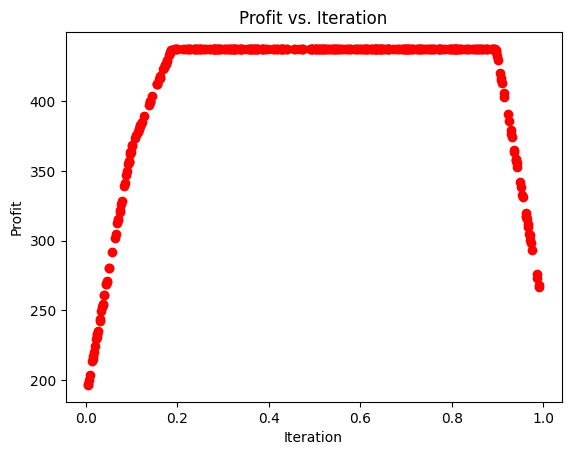

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *
np.random.seed(42)
profit_list1 = []
for r in np.random.random(400):
  model8 = ConcreteModel()

  model8.x1 = Var(domain=NonNegativeReals)
  model8.x2 = Var(domain=NonNegativeReals)
  model8.y1 = Var(domain=NonNegativeReals)
  model8.y2= Var(domain=NonNegativeReals)


  model8.con1 = Constraint(expr = 4*model8.x1 + 2*model8.x2 <=80 )
  model8.con2 =Constraint(expr = 2*model8.x1 + 5*model8.x2 <= 60 )
  model8.con3 = Constraint(expr = 5*model8.y1 + 3*model8.y2 <= 60)
  model8.con4 =Constraint(expr =  5*model8.y1 + 6*model8.y2 <= 75)
  model8.con5 = Constraint(expr = model8.x1 + model8.x2 <= 120*(r))
  model8.con6 = Constraint(expr = model8.y1 + model8.y2 <= 120*(1-r))



  model8.obj = Objective(expr= 10*(model8.x1 + model8.y1)+ 15*(model8.x2+model8.y2),sense= maximize)

  SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model8).write()
  profit_list1.append(model8.obj())

import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *
np.random.seed(42)
plt.scatter(np.random.random(400),profit_list1,color = 'red')

plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.title('Profit vs. Iteration')
#plt.grid(True)
plt.show()

In [25]:
model9 = ConcreteModel()

In [26]:
model9.x1 = Var(domain = NonNegativeReals)
model9.x2 = Var(domain = NonNegativeReals)
model9.x3 = Var(domain = NonNegativeReals)
# declaring constraints
#first constrant
model9.constr1 = Constraint(expr = 4*model9.x1 + 2*model9.x2 + model9.x3  >= 10)
# second  constrant
model9.constr2 = Constraint(expr =  2*model9.x1 + 5*model9.x2 + model9.x3 >= 15)

# declaring objective function for optimization problem
model9.profit = Objective(expr = 80*model9.x1+60*model9.x2+60*model9.x3, sense=minimize)
model9.pprint()

SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model9).write()
# display solution
print('\nprofit = ', model9.profit())
print('\nDecision Variables')
print('x1 = ', model9.x1())
print('x2 = ', model9.x2())

print('\nConstraints')
print('Constraint 1 = ', model9.constr1())
print('Constraint 2 = ', model9.constr2())

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 80*x1 + 60*x2 + 60*x3

2 Constraint Declarations
    constr1 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  10.0 : 4*x1 + 2*x2 + x3 :  +Inf :   True
    constr2 : Size=1, Index=None, Active=True
        Key  : Lower : Body             : Upper : Active
        None :  15.0 : 2*x1 + 5